In [80]:
# NLP = 사람의 언어를 컴퓨터가 이해하고, 생성하고, 활용하도록 만드는 기술

In [81]:
# 문장 토큰화 sent_tokenization
# 기본로직
    # 마침표, 느낌표, 물음표를 문장 끝 후보로 인식
    # 약어 패턴 학습(Dr, Mr, U.S.A 등)
    # 대문자로 시작하는지
    # 통계적 모델을 사용해 진짜 문장 경계인지 판단
# 다국어
# 약어와 실제 문장끝을 구분하는 기계학습 모델 내장

# 단어 토큰화 word_tokenization
    # 공백 기준
    # 구두점을 별도 토큰으로 분리
    # 축약형 처리 it's -> it, s
    # 소유격 처리 "Let's" Let, s

    # 구두점 기반 WordPuncTokenizer
    # 모든 구두점을 분리
    # It's It, ', s

    # 정규표현식 RegexpTokenizer
    # ^

# 노이즈와 불용어 제거
    # set 집합 자료구조로 변환 : 중복제거
    # List Comprehension : 불용어 필터링
    # NLTK 불용어 사전 : 불용어 목록

In [82]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [83]:
from nltk.tokenize import sent_tokenize
import nltk

In [84]:
nltk.download('wordnet')
nltk.download('webtext')
nltk.download('stopwords')

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('tagsets_json')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\Playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets_json to
[nltk_data]     C:\Users\Playdata2\AppData\Roaming\nltk_data...
[nltk_data]   P

True

#### 문장 토큰화

In [85]:
sentence = "Hello everyone. It's good to see you. Let's start our text minig class."
sent_tokenize(sentence)
# 리스트 형태로 문장별로 분리가 된것을 확인할 수 있다.
# 이것도 일종의 모델로 , 비지도학습으로 만들어졌다고 한다.
# 즉, 단순한 규칙 기반이 아니라 학습된 모델이기 때문에
# "Dr. Smith is here." 같은 경우에도 "Dr." 를 문장 끝으로 오인하지 않아요.

['Hello everyone.',
 "It's good to see you.",
 "Let's start our text minig class."]

In [86]:
sentence_kor = "안녕하세요, 여러분. 만나서 반갑습니다. 이제 학습을 시작해 볼까요?"
sent_tokenize(sentence_kor)
# 다국어도 지원하는 것을 확인할 수 있다.
# 한국어 기능이 좋은지, 다국어로 러프하게 지원하는 건지 아닌지 ^

['안녕하세요, 여러분.', '만나서 반갑습니다.', '이제 학습을 시작해 볼까요?']

#### 단어 토큰화

##### 공백 기준

In [87]:
from nltk.tokenize import word_tokenize
word_tokenize(sentence_kor)

['안녕하세요', ',', '여러분', '.', '만나서', '반갑습니다', '.', '이제', '학습을', '시작해', '볼까요', '?']

##### 구두점 기반

In [88]:
from nltk.tokenize import WordPunctTokenizer # 클래스
WordPunctTokenizer().tokenize(sentence)

['Hello',
 'everyone',
 '.',
 'It',
 "'",
 's',
 'good',
 'to',
 'see',
 'you',
 '.',
 'Let',
 "'",
 's',
 'start',
 'our',
 'text',
 'minig',
 'class',
 '.']

####  정규식 토큰화

In [89]:
# 정규식 토큰화
# 정규식 토큰화? ^
import re
re.findall("[abc]",sentence)

['a', 'c', 'a']

### 노이즈와 불용어 제거

In [90]:
# 영어, 불용어 목록 조회
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
english_stops = stopwords.words('english')
text1 = "Sorry, I couldn't go to movie yesterday."
# tokens = word_tokenize(text1)

#
tokenizer = RegexpTokenizer("[\\w']+")
tokens = tokenizer.tokenize(text1.lower())

# 리스트 컴프리헨션으로 불용어들을 걸러 리스트 구성하기
[token for token in tokens if token not in english_stops]

['sorry', 'go', 'movie', 'yesterday']

In [91]:
# 소문자 a~z로 이루어진 문자열에서 4글자 이상
RegexpTokenizer("[a-z{4,}]")

# 3글자 이상
RegexpTokenizer("[\\w']{3,}")

# 어포스트로피 ' 를 패턴에서 제외 can't can t
RegexpTokenizer("[\\w]")

RegexpTokenizer(pattern='[\\w]', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

### 어간 추출 Stemming
- 줄기 stems : 단어에서 불필요한 요소를 제거하고 남는 핵심 형태
- 단어는 다양한 형태를 가지고있다. 복수형 이나 과거형 과 같은 시제변환
- 단어를 통일
    - walk(걷다) walks walking walked --> 어간 walk로 통일
    - 먹는다 먹었다 --> 먹- 으로 묶어서 컴퓨터가 같은 단어로 인식

In [92]:
# PorterStemmer 규칙기바닝라서 완벽하지 못함 --> 속도가 빠름
#                                              의미가 달라질수도 있다.

In [93]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmer.stem('cooking'), stemmer.stem('coockery'), stemmer.stem('cookbooks')

('cook', 'coockeri', 'cookbook')

In [94]:
# LancasterStemmer 더 많은 규칙이 적용된다.
#                  과도한 축약 위험이 있다.

In [95]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
stemmer.stem('cooking'), stemmer.stem('coockery'), stemmer.stem('cookbooks')

('cook', 'coockery', 'cookbook')

### 표제어 추출 Lemmatization
- Lemma 단어의 사전 기본형
- 단어의 변형(시제, 복수/단수, 비교급)형태를 제거하고 사전(headword)에 나오는 정확한 원형으로 바꾸는 과정
- 어간처럼 단어줄기가 아니라, 맥락과 품사를 고려한 올바른 형태를 추출한다.

- better(비교급) -> good(원형)
- 먹었다(동사-과거형) -> 먹다(동사원형)
- 알고리즘 : 형태소 분석기(konlpy)를 사용해 품사(명사, 동사)를 보고 정확히 변환

##### 주요목적
- 어간 추출처럼 대충 줄이지 않고 맥락에 맞느 정확한 단어로 만들어서 단어 추출, NLP 품질 향상
- 단점 : 사전에 의존해서 언어 / 맥락 제한

In [96]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('cooking')) # 기본이 명사로인식
print(lemmatizer.lemmatize('cooking', pos = 'v')) # 품사를 동사(v)

cooking
cook


In [97]:
# pos 품사 설정 목록
# n noun 명사 - 기본설정
# v verb 동사
# a adjact 형용사
# r adverb

In [98]:
lemmatizer.lemmatize('better',pos='a')

'good'

In [99]:
# 표제어 변환에 어떤 한계가 있는지

### 품사 태깅

In [100]:
# nltk.download('averaged_perceptron_tagger_eng')
import nltk
from nltk.tokenize import word_tokenize
tokens = "hello everyone. It's good to see you. Let's start our text mining class."
tokens = word_tokenize(tokens)
nltk.pos_tag(tokens) # 품사 조회

[('hello', 'NN'),
 ('everyone', 'NN'),
 ('.', '.'),
 ('It', 'PRP'),
 ("'s", 'VBZ'),
 ('good', 'JJ'),
 ('to', 'TO'),
 ('see', 'VB'),
 ('you', 'PRP'),
 ('.', '.'),
 ('Let', 'VB'),
 ("'s", 'POS'),
 ('start', 'VB'),
 ('our', 'PRP$'),
 ('text', 'NN'),
 ('mining', 'NN'),
 ('class', 'NN'),
 ('.', '.')]

In [101]:
# nltk.download('tagsets_json')
# 품사 태그 정보 확인
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [102]:
# 특정 품사 추출
tag_lists = ['NN','VB','JJ'] # 추출할 품사 목록
[word for word, tag in nltk.pos_tag(tokens) if tag in tag_lists]

['hello', 'everyone', 'good', 'see', 'Let', 'start', 'text', 'mining', 'class']

In [103]:
# NLTK는 영어기반  한국어의 조사분리 불가능, 어미변화처리 불가능
# KoNlpy Okt 사용 해결

In [104]:
%pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [105]:
# ctrl + shift + p
# Java: Configure Java Runtime

In [106]:
from konlpy.tag import Okt
t = Okt()

In [107]:
sentence = '''절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비출어줄까.
정희성, 희망 공부'''

tokens = word_tokenize(sentence)
print(tokens)
print(nltk.pos_tag(tokens))

['절망의', '반대가', '희망은', '아니다', '.', '어두운', '밤하늘에', '별이', '빛나듯', '희망은', '절망', '속에', '싹트는', '거지', '만약에', '우리가', '희망함이', '적다면', '그', '누가', '세상을', '비출어줄까', '.', '정희성', ',', '희망', '공부']
[('절망의', 'JJ'), ('반대가', 'NNP'), ('희망은', 'NNP'), ('아니다', 'NNP'), ('.', '.'), ('어두운', 'VB'), ('밤하늘에', 'JJ'), ('별이', 'NNP'), ('빛나듯', 'NNP'), ('희망은', 'NNP'), ('절망', 'NNP'), ('속에', 'NNP'), ('싹트는', 'NNP'), ('거지', 'NNP'), ('만약에', 'NNP'), ('우리가', 'NNP'), ('희망함이', 'NNP'), ('적다면', 'NNP'), ('그', 'NNP'), ('누가', 'NNP'), ('세상을', 'NNP'), ('비출어줄까', 'NNP'), ('.', '.'), ('정희성', 'NN'), (',', ','), ('희망', 'NNP'), ('공부', 'NNP')]


In [108]:
# NNP는 고유명사이다.
# 대부분이 고유명사로 잘못인식되고있다.
# 이는 사용하고있는 툴이 영어 중심이기 때문

In [109]:
from konlpy.tag import Okt
t = Okt()
print(f'형태소 : {t.morphs(sentence)}')
print(f'명사 : {t.nouns(sentence)}')
print(f'품사태깅 : {t.pos(sentence)}')

형태소 : ['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비출어줄까', '.', '\n', '정희성', ',', '희망', '공부']
명사 : ['절망', '반대', '희망', '어', '두운', '밤하늘', '별', '희망', '절망', '속', '거지', '만약', '우리', '희망', '함', '그', '누가', '세상', '정희성', '희망', '공부']
품사태깅 : [('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('어', 'Noun'), ('두운', 'Noun'), ('밤하늘', 'Noun'), ('에', 'Josa'), ('별', 'Noun'), ('이', 'Josa'), ('빛나듯', 'Verb'), ('\n', 'Foreign'), ('희망', 'Noun'), ('은', 'Josa'), ('절망', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('싹트는', 'Verb'), ('거지', 'Noun'), ('\n', 'Foreign'), ('만약', 'Noun'), ('에', 'Josa'), ('우리', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('함', 'Noun'), ('이', 'Josa'), ('적다면', 'Verb'), ('\n', 'Foreign'), ('그', 'Noun'), ('누가', 'Noun'), ('세상', 

In [110]:
# 그래프와 워드클라우드
# 데이터 불러오기
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
gutenberg.fileids()
doc_alice = gutenberg.open('carroll-alice.txt').read()
print(doc_alice)

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quite natural); but

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [111]:
# 토큰화 및 전처리
from nltk.tokenize import word_tokenize
tokens_alice = word_tokenize(doc_alice)
print(len(tokens_alice))

33535


In [112]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\\w']{3,}")
reg_alice = tokenizer.tokenize(doc_alice.lower())
print(len(reg_alice))

21616


In [113]:
reg_alice

["alice's",
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 '1865',
 'chapter',
 'down',
 'the',
 'rabbit',
 'hole',
 'alice',
 'was',
 'beginning',
 'get',
 'very',
 'tired',
 'sitting',
 'her',
 'sister',
 'the',
 'bank',
 'and',
 'having',
 'nothing',
 'once',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 'but',
 'had',
 'pictures',
 'conversations',
 "'and",
 'what',
 'the',
 'use',
 'book',
 'thought',
 'alice',
 "'without",
 'pictures',
 'conversation',
 'she',
 'was',
 'considering',
 'her',
 'own',
 'mind',
 'well',
 'she',
 'could',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'and',
 'stupid',
 'whether',
 'the',
 'pleasure',
 'making',
 'daisy',
 'chain',
 'would',
 'worth',
 'the',
 'trouble',
 'getting',
 'and',
 'picking',
 'the',
 'daisies',
 'when',
 'suddenly',
 'white',
 'rabbit',
 'with',
 'pink',
 'eyes',
 'ran',
 'close',
 'her',
 'there',
 'was',
 'nothing',
 'very',
 '

In [114]:
# 불용어 제거
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))
result_alice = [word for word in reg_alice if word not in english_stops]
print(len(result_alice))

12871


In [115]:
# 품사 태깅 및 필터링
# 명사 동사 형용사만 추출
tag_lists = ['NN','VB', 'VBD', 'JJ'] # 추출할 품사 목록
tagged_word = [word for word, tag in nltk.pos_tag(reg_alice) if tag in tag_lists]

In [116]:
# 종복 횟수 확인 및 횟수를 딕셔너리에 저장
from collections import Counter
print(Counter(tagged_word))
sorted_word_count = dict(Counter(tagged_word))

Counter({'said': 462, 'was': 356, 'alice': 298, 'had': 176, 'little': 124, 'were': 84, 'went': 83, 'time': 71, 'queen': 67, 'thought': 60, 'did': 60, 'began': 58, 'way': 56, 'mock': 56, 'turtle': 56, 'gryphon': 55, 'hatter': 54, 'king': 54, 'head': 49, 'thing': 49, 'voice': 47, 'rabbit': 46, 'looked': 44, 'see': 41, 'such': 41, 'mouse': 40, 'came': 40, 'other': 40, 'get': 39, 'great': 39, 'duchess': 39, 'tone': 38, 'have': 37, 'got': 36, 'dormouse': 36, 'cat': 35, 'first': 34, 'large': 33, "i'm": 33, 'last': 33, 'march': 33, 'think': 32, "don't": 32, 'nothing': 30, 'white': 30, 'door': 30, 'round': 30, 'hare': 30, 'day': 29, 'moment': 29, 'good': 27, 'much': 27, "it's": 27, 'replied': 27, 'poor': 26, 'course': 26, 'caterpillar': 26, 'seemed': 25, 'look': 25, 'took': 24, 'right': 24, 'know': 24, 'tell': 24, 'heard': 24, 'put': 23, 'same': 23, 'added': 23, 'dear': 22, 'found': 22, 'felt': 22, 'next': 22, 'made': 21, 'long': 21, 'half': 21, "i'll": 21, 'jury': 21, 'wish': 20, 'hand': 20, 

In [117]:
# %pip install wordcloud

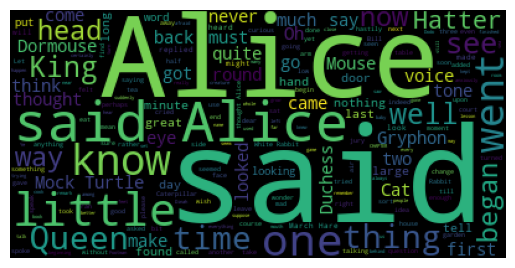

In [118]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud().generate(doc_alice)
plt.axis('off')
plt.imshow(wordcloud)

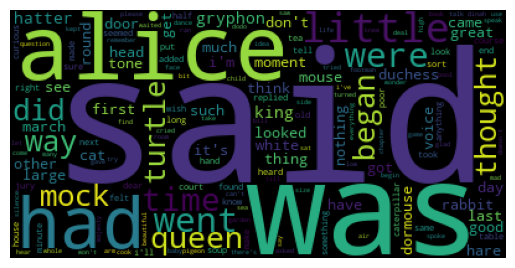

In [119]:
wc = wordcloud.generate_from_frequencies(sorted_word_count)
plt.axis('off')
plt.imshow(wc)
plt.show()

In [120]:
# 영화 리뷰 데이터셋 로드
import nltk
nltk.download("movie_reviews")
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [121]:

# 데이터셋 구조 확인
from nltk.corpus import movie_reviews
print(f'review count : {len(movie_reviews.fileids())}')
print(f'categories of reviews : {movie_reviews.categories()}')

review count : 2000
categories of reviews : ['neg', 'pos']


In [122]:

#BOW 카운트 백터 생성
# 수동 구현
documents =  [movie_reviews.words(fileid) for fileid in  movie_reviews.fileids()]

In [123]:

# 단어 빈도 계산
word_count = {}
for text in documents:
    for word in text:
        word_count[word] = word_count.get(word,0) + 1 
sorted_features = sorted(word_count, key=word_count.get,reverse=True)

In [124]:
# 전처리 및 재계산
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer("[\\w']{3,}")
english_stops = set(stopwords.words('english'))
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
tokens = [ [token for token in tokenizer.tokenize(doc) if token not in english_stops]for doc in documents]

In [125]:
sorted_features

[',',
 'the',
 '.',
 'a',
 'and',
 'of',
 'to',
 "'",
 'is',
 'in',
 's',
 '"',
 'it',
 'that',
 '-',
 ')',
 '(',
 'as',
 'with',
 'for',
 'his',
 'this',
 'film',
 'i',
 'he',
 'but',
 'on',
 'are',
 't',
 'by',
 'be',
 'one',
 'movie',
 'an',
 'who',
 'not',
 'you',
 'from',
 'at',
 'was',
 'have',
 'they',
 'has',
 'her',
 'all',
 '?',
 'there',
 'like',
 'so',
 'out',
 'about',
 'up',
 'more',
 'what',
 'when',
 'which',
 'or',
 'she',
 'their',
 ':',
 'some',
 'just',
 'can',
 'if',
 'we',
 'him',
 'into',
 'even',
 'only',
 'than',
 'no',
 'good',
 'time',
 'most',
 'its',
 'will',
 'story',
 'would',
 'been',
 'much',
 'character',
 'also',
 'get',
 'other',
 'do',
 'two',
 'well',
 'them',
 'very',
 'characters',
 ';',
 'first',
 '--',
 'after',
 'see',
 '!',
 'way',
 'because',
 'make',
 'life',
 'off',
 'too',
 'any',
 'does',
 'really',
 'had',
 'while',
 'films',
 'how',
 'plot',
 'little',
 'where',
 'people',
 'over',
 'could',
 'then',
 'me',
 'scene',
 'man',
 'bad',
 '

In [126]:

word_count = {}
for text in tokens:
    for word in text:
        word_count[word] = word_count.get(word,0) + 1
sorted_featrues = sorted(word_count, key=word_count.get, reverse=True)        
for word in sorted_featrues[:10]:
    print(f"{word} : {word_count[word]}")

film : 8935
one : 5791
movie : 5538
like : 3690
even : 2564
time : 2409
good : 2407
story : 2136
would : 2084
much : 2049


In [127]:
# %conda install scikit-learn

In [128]:
# CountVectorizer 문서를 벡터화
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(vocabulary=sorted_features)
cv

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


In [130]:
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
reviews[0]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe